In [14]:
import pickle
import matplotlib.pyplot as plt
from dota2_api import get_api_json

with open("hero_name.pickle", 'rb') as handle:
    hero_name = pickle.load(handle)

In [8]:
hero_name

{1: ['Anti-Mage', '敌法师'],
 2: ['Axe', '斧王'],
 3: ['Bane', '祸乱之源'],
 4: ['Bloodseeker', '嗜血狂魔'],
 5: ['Crystal Maiden', '水晶室女'],
 6: ['Drow Ranger', '卓尔游侠'],
 7: ['Earthshaker', '撼地者'],
 8: ['Juggernaut', '主宰'],
 9: ['Mirana', '米拉娜'],
 10: ['Morphling', '变体精灵'],
 11: ['Shadow Fiend', '影魔'],
 12: ['Phantom Lancer', '幻影长矛手'],
 13: ['Puck', '帕克'],
 14: ['Pudge', '帕吉'],
 15: ['Razor', '剃刀'],
 16: ['Sand King', '沙王'],
 17: ['Storm Spirit', '风暴之灵'],
 18: ['Sven', '斯温'],
 19: ['Tiny', '小小'],
 20: ['Vengeful Spirit', '复仇之魂'],
 21: ['Windranger', '风行者'],
 22: ['Zeus', '宙斯'],
 23: ['Kunkka', '昆卡'],
 25: ['Lina', '莉娜'],
 26: ['Lion', '莱恩'],
 27: ['Shadow Shaman', '暗影萨满'],
 28: ['Slardar', '斯拉达'],
 29: ['Tidehunter', '潮汐猎人'],
 30: ['Witch Doctor', '巫医'],
 31: ['Lich', '巫妖'],
 32: ['Riki', '力丸'],
 33: ['Enigma', '谜团'],
 34: ['Tinker', '修补匠'],
 35: ['Sniper', '狙击手'],
 36: ['Necrophos', '瘟疫法师'],
 37: ['Warlock', '术士'],
 38: ['Beastmaster', '兽王'],
 39: ['Queen of Pain', '痛苦女王'],
 40: ['Venomancer', '剧毒

In [2]:
# 添加英雄中文名称对照
'''
hero_name[121] = ['Grimstroke','天涯墨客']
hero_name[129] = ['Mars','玛尔斯']
pickle.dump(hero_name, open("hero_name.pickle", "wb"))
'''

In [27]:
dotaid_dic = {"肖师傅": 217355878,"张师傅":140070354,"艾师傅":183976115,"李师傅":126174602}

In [37]:
# 构造api字符串
name = '肖师傅'
api_base = "https://www.opendota.com/api/"
id = dotaid_dic[name]
api = api_base + "players/" + str(id) + "/heroes"

68
117
117
21.308823529411764
8


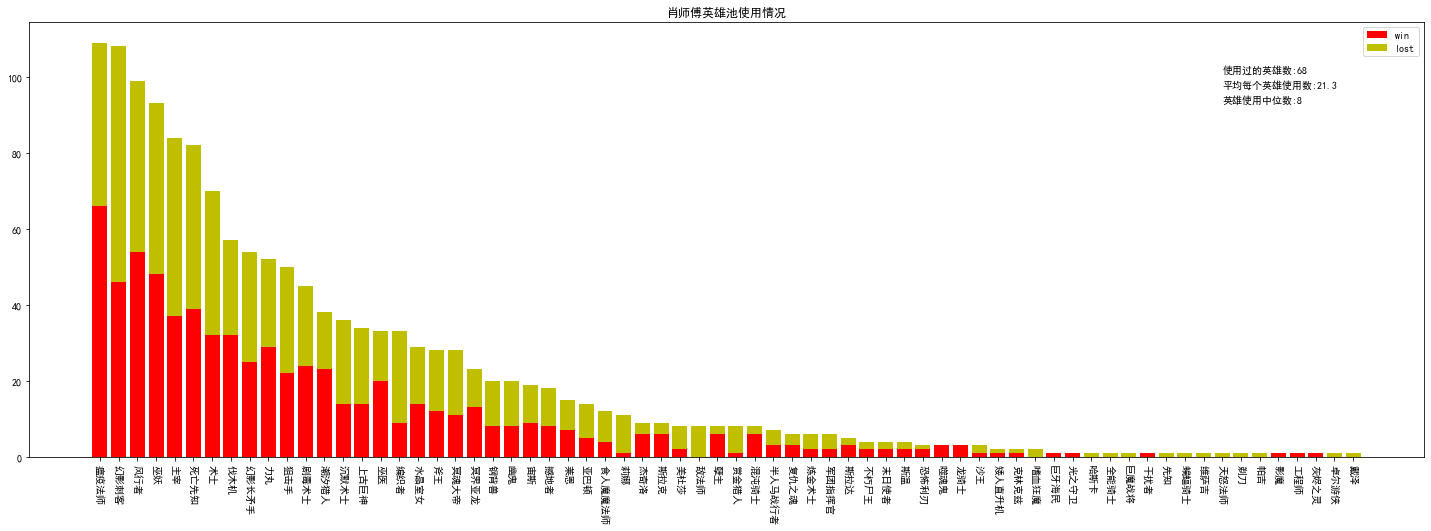

In [38]:
heroes_data = get_api_json(api)
heroname_list = [hero_name[int(i["hero_id"])][1] for i in heroes_data if int(i["hero_id"]) in hero_name.keys()]
hero_win_num = [int(i["win"]) for i in heroes_data if int(i["hero_id"]) in hero_name.keys()]
hero_lost_num = [int(i["games"])-int(i["win"]) for i in heroes_data if int(i["hero_id"]) in hero_name.keys()]
hero_game_num = [int(i["games"]) for i in heroes_data if int(i["hero_id"]) in hero_name.keys()]

length = len([i for i in hero_game_num if i>0])
print(length)
print(len(hero_win_num))
print(len(hero_lost_num))

avg_hero_num = sum(hero_game_num)/length
middle_hero_num = hero_game_num[int(length/2)]
print(avg_hero_num)
print(middle_hero_num)

heroname_list = heroname_list[:length]
hero_win_num = hero_win_num[:length]
hero_lost_num = hero_lost_num[:length]

fig, ax1 = plt.subplots(figsize=(25, 8))
ax1.set_title(name+'英雄池使用情况',fontsize=12)
for xtick in ax1.get_xticklabels():
    xtick.set_rotation(270)
    xtick.set_size(10)
plt.rcParams['font.sans-serif']=['SimHei']
plt.text(len(hero_win_num)-8,hero_game_num[0]-8,"使用过的英雄数:" + str(length))
plt.text(len(hero_win_num)-8,hero_game_num[0]-12,"平均每个英雄使用数:" + str(round(avg_hero_num,1)))
plt.text(len(hero_win_num)-8,hero_game_num[0]-16,"英雄使用中位数:" + str(middle_hero_num))
ax1.bar(range(len(hero_win_num)), hero_win_num, label='win',fc = 'r')
ax1.bar(range(len(hero_lost_num)), hero_lost_num, bottom=hero_win_num, label='lost',tick_label = heroname_list,fc = 'y')
plt.legend()
plt.savefig(name + ".png", dpi=500,bbox_inches = 'tight')
plt.show()

In [25]:
plt.savefig("1.png", dpi=500,bbox_inches = 'tight')